# Where are the Dundies? Face recognition in Python.

## Introduction
### About the The Office
"The Office" is a beloved American television sitcom that originally aired from 2005 to 2013. Created by Greg Daniels, this mockumentary-style show is set in the mundane and often absurd world of the Dunder Mifflin Paper Company. The series masterfully blends humor and heart as it follows the daily lives of the quirky employees, including the bumbling but well-meaning regional manager Michael Scott, played by Steve Carell. With its witty writing, memorable characters, and moments of both hilarity and poignancy, "The Office" has left an enduring legacy, continuing to be a favorite among viewers for its sharp commentary on office life and the bonds formed among colleagues. [https://www.imdb.com/title/tt0386676/]
### About face recognition
Face recognition is a sophisticated biometric technology that identifies and verifies individuals based on their unique facial features. It involves capturing and analyzing facial data using advanced algorithms, allowing for applications such as secure authentication on smartphones, surveillance, and law enforcement. While it offers convenience and enhanced security, it also raises concerns about privacy and potential misuse, sparking ongoing debates and regulatory discussions about its responsible use. Nevertheless, face recognition continues to play a significant role in modern technology, reshaping how we interact with devices and bolstering security measures in various sectors.
### About used packages
**OpenCV**, short for Open Source Computer Vision Library, is an open-source computer vision and image processing library that has become a fundamental tool for developers working in fields like computer vision, machine learning, and robotics. Developed by Intel, OpenCV offers a comprehensive suite of functions and algorithms to handle tasks such as image and video manipulation, object detection, facial recognition, and more. Its cross-platform nature and support for various programming languages, including Python, make it a versatile choice for a wide range of computer vision applications. OpenCV's extensive documentation and active community contribute to its popularity and usability in both research and industry. [https://opencv.org]

The **face_recognition** package is a user-friendly Python wrapper built on top of dlib. It simplifies the process of face detection and recognition, making it accessible to developers without extensive computer vision expertise. These packages have gained popularity due to their ease of use and ability to integrate facial recognition into Python projects, from simple face detection to more complex applications such as emotion recognition and face attribute analysis. They have made facial recognition technology more accessible and usable for a broader audience of Python developers. [https://github.com/ageitgey/face_recognition]
### To do
1. Load photos of The Office characters 
2. Encode train images and indentify faces
3. Load and encode test image
4. Detect faces in test image and match it with The Office characters faces
5. Draw rectangles on detected faces and add character's names
6. Show test photo with recognized faces

In [93]:
#image processing and recognition
import face_recognition as fr
import cv2
import dlib

#os and basic packages for data analytics and viz
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pylab as plt

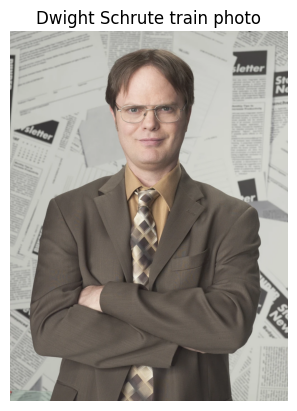

In [94]:
# Training face-recognition model

# setting path for train images folder
path = './the_office_train_photos/'
# showing sample image in train folder
sample_train_image = plt.imread('./the_office_train_photos/Dwight.jpg') #images readed with matplotlib are in RGB form, so there is no need to convert it (like in cv2).
plt.imshow(sample_train_image)
plt.axis('off')
plt.title('Dwight Schrute train photo')
plt.show()

In [95]:

character_names = [] #empty list for characters names
character_encodings = [] #empty list for cast face encodings
train_images = os.listdir(path)

#simple loop for processing and encoding test images
for i in train_images: 
    image = fr.load_image_file(path + i)
    image_encoding = fr.face_encodings(image)[0]
    image_path = path + i

    character_encodings.append(image_encoding)
    character_names.append(os.path.splitext(os.path.basename(image_path))[0])

#character_names #checking if names are correct


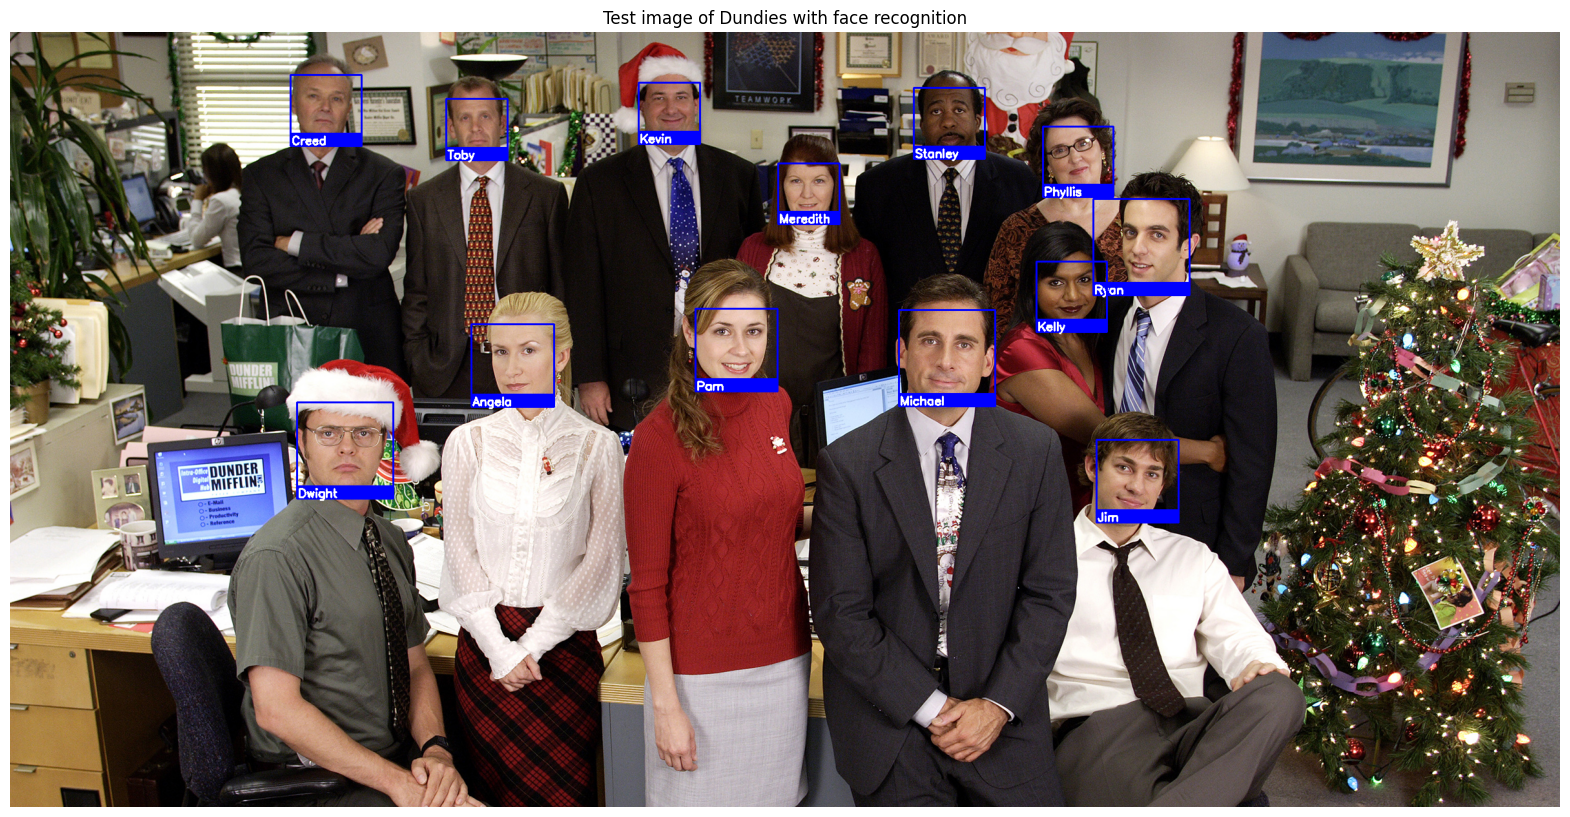

In [96]:
# TESTING

#read the test image
test_image_path = './the_office_test_photos/dundies3.jpg'
test_image = plt.imread(test_image_path)

#locating faces in test image
test_face_locations = fr.face_locations(test_image)
test_face_encodings = fr.face_encodings(test_image, test_face_locations)

#parralel iteration for drawing a rectangles (faces locations) and checking face encodings on test image
for (top, right, bottom, left), test_face_encodings in zip(test_face_locations, test_face_encodings): #using zip function for aggregating lists
    match_character = fr.compare_faces(character_encodings, test_face_encodings) #recognizing the office cast in the picture/ setting tolerance
    name = ''

    face_distances = fr.face_distance(character_encodings, test_face_encodings)
    best_match = np.argmin(face_distances) #creating variable with best match / minumim tolerance
    if match_character[best_match]:
        name = character_names[best_match] #setting character name for face recognized
    
    #rectangle borders and text with names
    cv2.rectangle(test_image, (left -10, top -10), (right +10, bottom +10), (0, 0, 255), 2)
    cv2.rectangle(test_image, (left-10, bottom -10), (right +10, bottom +10), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(test_image, name, (left -8, bottom +8), font, .6, (255, 255, 255), 2)

#showing test photo with faces recognized
fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(test_image)
plt.axis('off')
plt.title("Test image of Dundies with face recognition")
plt.show()